# Load All Toronto Weather Data

In [22]:
import pandas as pd
import glob
import os

### Get All Bike Trips Data ###
# Get all CSV files from both the 2023 and 2024 folders
csv_files = glob.glob('raw_data/toronto-*-weather-data-LTC/*.csv')

# Read and combine all files
df_list = []
for file in csv_files:
    print(f"Reading {file}...")
    df = pd.read_csv(file, encoding='cp1252')
    df_list.append(df)
print(len(df_list), "files read.")

Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_06-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_01-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_12-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_07-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_09-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_08-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_10-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_05-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_02-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_climate_hourly_ON_6158359_03-2024_P1H.csv...
Reading raw_data/toronto-2024-weather-data-LTC/en_

In [51]:
### Combine all weather data into one DataFrame
all_weather_df = pd.concat(df_list, ignore_index=True)

# Rename columns for easier access
all_weather_df.rename(columns={'ï»¿"Longitude (x)"': 'Longitude', 'Latitude (y)': 'Latitude',
                               'Temp (Â°C)': 'Temp (°C)', 'Dew Point Temp (Â°C)': 'Dew Point Temp (°C)'}, inplace=True)
all_weather_df.drop(columns=['Flag', 'Temp Flag', 'Dew Point Temp Flag', 'Rel Hum Flag', 
                             'Precip. Amount Flag', 'Wind Dir Flag', 'Wind Chill Flag', 
                             'Wind Spd Flag', 'Visibility Flag', 'Stn Press Flag', 'Hmdx Flag'], inplace=True)

# Convert 'Date/Time' to datetime and add Timezone info
all_weather_df['Date/Time'] = pd.to_datetime(all_weather_df['Date/Time (LST)'])
all_weather_df.drop(columns=['Date/Time (LST)'], inplace=True)
all_weather_df.drop(columns=['Year', 'Month', 'Day', 'Time (LST)'], inplace=True)

all_weather_df['Date/Time'] = all_weather_df['Date/Time'].dt.tz_localize(
    'America/Toronto', 
    nonexistent='shift_forward',
    ambiguous=False
    )

all_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype                          
---  ------               --------------  -----                          
 0   Longitude            17544 non-null  float64                        
 1   Latitude             17544 non-null  float64                        
 2   Station Name         17544 non-null  object                         
 3   Climate ID           17544 non-null  int64                          
 4   Temp (°C)            17508 non-null  float64                        
 5   Dew Point Temp (°C)  17508 non-null  float64                        
 6   Rel Hum (%)          17508 non-null  float64                        
 7   Precip. Amount (mm)  17508 non-null  float64                        
 8   Wind Dir (10s deg)   16626 non-null  float64                        
 9   Wind Spd (km/h)      17504 non-null  float64                        
 10

In [52]:
# Clean null values with interpolation for time series data
cols_to_interpolate = [
    'Temp (°C)', 
    'Dew Point Temp (°C)', 
    'Rel Hum (%)', 
    'Stn Press (kPa)', 
    'Visibility (km)',
    'Wind Spd (km/h)'
]

for col in cols_to_interpolate:
    all_weather_df[col] = all_weather_df[col].interpolate(method='linear')

# Fill precipitation with 0
all_weather_df['Precip. Amount (mm)'] = all_weather_df['Precip. Amount (mm)'].fillna(0)

all_weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype                          
---  ------               --------------  -----                          
 0   Longitude            17544 non-null  float64                        
 1   Latitude             17544 non-null  float64                        
 2   Station Name         17544 non-null  object                         
 3   Climate ID           17544 non-null  int64                          
 4   Temp (°C)            17544 non-null  float64                        
 5   Dew Point Temp (°C)  17544 non-null  float64                        
 6   Rel Hum (%)          17544 non-null  float64                        
 7   Precip. Amount (mm)  17544 non-null  float64                        
 8   Wind Dir (10s deg)   16626 non-null  float64                        
 9   Wind Spd (km/h)      17544 non-null  float64                        
 10

<Axes: >

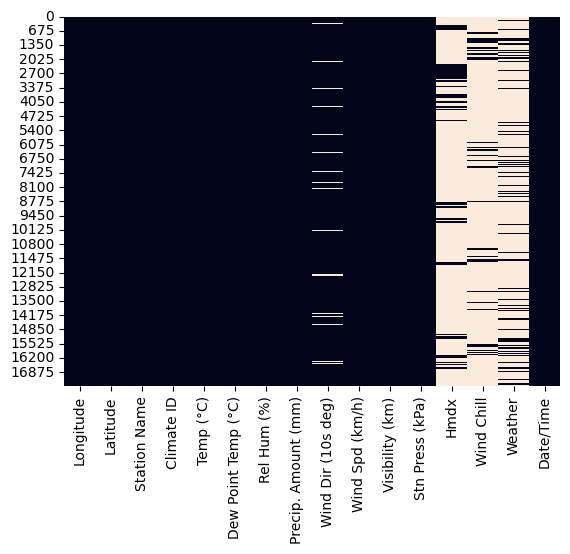

In [54]:
import seaborn as sns

sns.heatmap(all_weather_df.isnull(), cbar=False)

In [55]:
all_weather_df.to_csv('all_weather.csv', index=False)